In [2]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi


# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.circuit.library import C3XGate
# import basic plot tools
from qiskit.visualization import plot_histogram

import mplhep
plt.style.use(mplhep.style.LHCb2)  # CMS or ATLAS/LHCb

In [3]:
def initialize (qc, num_qubit, num_matching):
    qc.x(num_qubit - 1)
    for q in range(num_matching + 1):
        qc.h(q)
    return qc

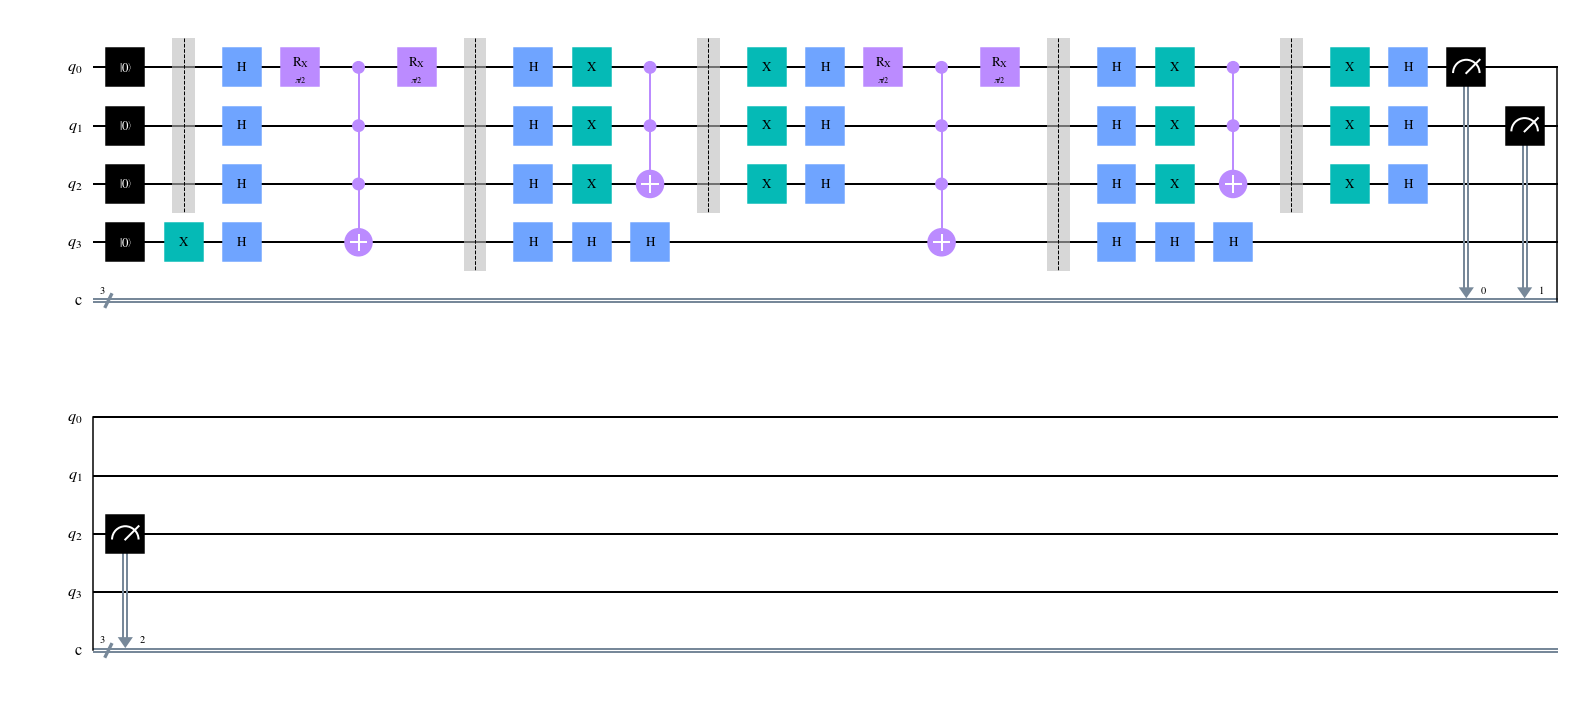

In [11]:
n_qubit = 4
num_matching = 3
grover_circuit  = QuantumCircuit(n_qubit, num_matching)
grover_circuit.reset(range(0, 4))
grover_circuit.barrier([0, 1, 2])
grover_circuit = initialize(grover_circuit, n_qubit, num_matching)
grover_circuit.rx(pi/2, 0)
#grover_circuit.x([0])
grover_circuit.append(C3XGate(), [0, 1, 2, 3])
grover_circuit.rx(pi/2, 0)
#grover_circuit.x([0])
grover_circuit.barrier([0, 1, 2, 3])
grover_circuit.h([0, 1, 2, 3])
grover_circuit.x([0, 1, 2])
grover_circuit.h([3])
grover_circuit.ccx(0, 1, 2)
grover_circuit.h([3])
grover_circuit.barrier([0, 1, 2])
grover_circuit.x([0, 1, 2])
grover_circuit.h([0, 1, 2])


grover_circuit.measure([0, 1, 2], [0, 1, 2])
grover_circuit.draw(output= "mpl")


In [12]:
from qiskit import BasicAer, Aer,execute
sim = Aer.get_backend('aer_simulator')

In [13]:
job = execute(grover_circuit, backend = sim, shots = 8192)

In [14]:
counts = job.result().get_counts()

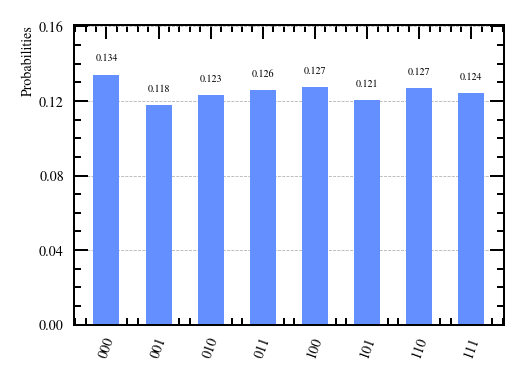

In [15]:
plot_histogram(counts)